In [1]:
import requests
import pandas as pd
import json
import pprint
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from matplotlib.colors import ListedColormap
import missingno as msno
import pandasql as ps
import warnings
import pandas_profiling as pf

In [25]:
items_dataset = pd.read_csv('data/export_dataframe.csv')

In [3]:
items_dataset.head()

,title,price,domain_id,condition,accepts_mercadopago,free_shipping,country_seller,original_price,available_quantity,total_transactions_seller,...,negative_rating,neutral_rating,delayed_handlingtime_rate,delayed_handlingtime_value,seller_sales_completed,seller_cancellations_rate,seller_cancellations_value,currency_id,sold_quantity,category
0,Smart Tv Hitachi Cdh-le32smart17 Led Hd 32,24999.0,MLA-TELEVISIONS,new,True,False,Argentina,32999.0,145,11374,...,0.05,0.07,0.0000,0,845,0.0000,0,ARS,17,tv
1,Smart Tv Samsung Series 7 Un50tu7000gczb Led 4...,56999.0,MLA-TELEVISIONS,new,True,False,Argentina,NaN,9,21670,...,0.11,0.06,0.0000,0,3777,0.0000,0,ARS,0,tv
2,Smart Tv Noblex Dm32x7000 Led Hd 32,24999.0,MLA-TELEVISIONS,new,True,True,Argentina,NaN,9,6889,...,0.03,0.04,0.0500,27,954,0.0000,0,ARS,171,tv
3,Smart Tv Tedge Ntv43hd Led Full Hd 43,32999.0,MLA-TELEVISIONS,new,True,True,Argentina,34999.0,1786,325068,...,0.03,0.01,0.0000,0,67102,0.0006,46,ARS,2849,tv
4,Smart Tv Rca Xf43sm Led Full Hd 43,33480.0,MLA-TELEVISIONS,new,True,True,Argentina,NaN,10,13847,...,0.01,0.01,0.0031,5,1756,0.0049,9,ARS,1,tv


In [4]:
items_dataset.shape

(198737, 24)

In [ ]:
pf.ProfileReport(items_dataset)

In [26]:
items_dataset["price_change"] = np.where(items_dataset['original_price'].isnull(),
                                         0, 
                                         items_dataset['original_price'] - items_dataset['price'])

In [27]:
items_dataset['has_discount'] = np.where(items_dataset['original_price'].isnull(), 0, 1)

In [28]:
items_dataset["perct_discount"] = 100 - (100 * items_dataset["price"] 
                                          / items_dataset["original_price"]) 


In [29]:
items_dataset['perct_discount'].replace(to_replace = np.nan, 
                                        value = 0,
                                        inplace=True) 

In [31]:
items_discount = items_dataset[items_dataset['original_price'] > 0]

In [44]:
items_discount.head()

,title,price,domain_id,condition,accepts_mercadopago,free_shipping,country_seller,original_price,available_quantity,total_transactions_seller,...,neutral_rating,delayed_handlingtime_rate,delayed_handlingtime_value,seller_sales_completed,seller_cancellations_rate,seller_cancellations_value,currency_id,sold_quantity,category,perct_discount
0,Smart Tv Hitachi Cdh-le32smart17 Led Hd 32,24999.0,MLA-TELEVISIONS,new,True,False,Argentina,32999.0,145,11374,...,0.07,0.0000,0,845,0.0000,0,ARS,17,tv,24.243159
3,Smart Tv Tedge Ntv43hd Led Full Hd 43,32999.0,MLA-TELEVISIONS,new,True,True,Argentina,34999.0,1786,325068,...,0.01,0.0000,0,67102,0.0006,46,ARS,2849,tv,5.714449
12,Smart Tv Bgh B3219k5 Led Hd 32,25390.0,MLA-TELEVISIONS,new,True,True,Argentina,30990.0,12,416507,...,0.01,0.0063,378,62208,0.0112,738,ARS,91,tv,18.070345
15,Smart Tv Tedge Ntv504k Led 4k 50,45999.0,MLA-TELEVISIONS,new,True,True,Argentina,48999.0,687,325068,...,0.01,0.0000,0,67102,0.0006,46,ARS,504,tv,6.122574
24,Smart Tv Noblex X7 Series Dm50x7500 Led Hd 50,44993.0,MLA-TELEVISIONS,new,True,True,Argentina,49998.0,40,139905,...,0.01,0.0296,696,23443,0.0006,15,ARS,6,tv,10.010400


In [ ]:
pf.ProfileReport(items_discount)

In [30]:
items_dataset['condition'].unique()

array(['new', 'used', 'not_specified'], dtype=object)

In [37]:
items_dataset['free_shipping'].unique()

array([False,  True])

In [41]:
items_dataset['power_seller_status'].unique()

array(['platinum', 'gold', 'silver'], dtype=object)

In [31]:
to_drop = ['country_seller', 'accepts_mercadopago',
           'currency_id', 'category', 'original_price',
           'title','domain_id']

In [32]:
try:
    for column in to_drop:
        items_dataset.drop([column], axis = 1, inplace=True)
except:
    pass
    

In [43]:
items_dataset.head()

,price,condition,free_shipping,available_quantity,total_transactions_seller,canceled_transactions_seller,completed_transactions_reseller,positive_rating,power_seller_status,negative_rating,neutral_rating,delayed_handlingtime_rate,delayed_handlingtime_value,seller_sales_completed,seller_cancellations_rate,seller_cancellations_value,sold_quantity,price_change,has_discount,perct_discount
0,24999.0,1,0,145,11374,1116,10258,0.88,1,0.05,0.07,0.0000,0,845,0.0000,0,17,8000.0,1,24.243159
1,56999.0,1,0,9,21670,2258,19412,0.83,1,0.11,0.06,0.0000,0,3777,0.0000,0,0,0.0,0,0.000000
2,24999.0,1,1,9,6889,521,6368,0.93,1,0.03,0.04,0.0500,27,954,0.0000,0,171,0.0,0,0.000000
3,32999.0,1,1,1786,325068,14429,310639,0.96,1,0.03,0.01,0.0000,0,67102,0.0006,46,2849,2000.0,1,5.714449
4,33480.0,1,1,10,13847,642,13205,0.98,1,0.01,0.01,0.0031,5,1756,0.0049,9,1,0.0,0,0.000000


In [34]:
 items_dataset.isna().sum()

price                                  0
condition                              0
free_shipping                          0
available_quantity                     0
total_transactions_seller              0
canceled_transactions_seller           0
completed_transactions_reseller        0
positive_rating                        0
power_seller_status                30094
negative_rating                        0
neutral_rating                         0
delayed_handlingtime_rate              0
delayed_handlingtime_value             0
seller_sales_completed                 0
seller_cancellations_rate              0
seller_cancellations_value             0
sold_quantity                          0
price_change                           0
has_discount                           0
perct_discount                         0
dtype: int64

In [35]:
items_dataset['power_seller_status'].fillna(items_dataset['power_seller_status'].mode()[0],
                                            inplace=True)

In [42]:
items_dataset.replace({
                'power_seller_status': {
                    'gold': 0,
                    'platinum':  1 ,
                    'silver': 2
            }
        }, inplace=True)

In [ ]:
items_dataset.replace({
                'condition': {
                    'new': 1,
                    'used': 0,
                    'not_specified': 2
            }
        }, inplace=True)

In [40]:
items_dataset.replace({
                'free_shipping': {
                    True: 1,
                    False: 0
            }
        }, inplace=True)

In [14]:
items_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,198737.0,29657.137376,40954.244733,22.0,3585.00,18399.0000,40390.0000,618800.000000
available_quantity,198737.0,360.297786,3346.471026,1.0,1.00,1.0000,50.0000,50000.000000
total_transactions_seller,198737.0,34227.990591,59293.100264,0.0,3369.00,14553.0000,35534.0000,437673.000000
canceled_transactions_seller,198737.0,2153.915939,3592.164199,0.0,197.00,830.0000,2796.0000,27908.000000
completed_transactions_reseller,198737.0,32074.074651,55802.901513,0.0,3157.00,13678.0000,33343.0000,409765.000000
positive_rating,198737.0,0.952562,0.108841,0.0,0.95,0.9700,0.9800,1.000000
negative_rating,198737.0,0.020224,0.029713,0.0,0.01,0.0200,0.0300,1.000000
neutral_rating,198737.0,0.025237,0.096473,0.0,0.01,0.0100,0.0200,1.000000
delayed_handlingtime_rate,198737.0,0.016073,0.028501,0.0,0.00,0.0044,0.0192,0.363600
delayed_handlingtime_value,198737.0,115.792791,412.592614,0.0,0.00,6.0000,43.0000,3248.000000


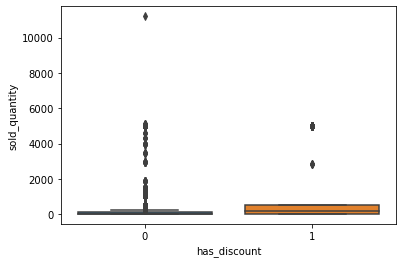

In [60]:
sns.boxplot(y=items_dataset["sold_quantity"], 
             x=items_dataset["has_discount"] )

In [62]:
df_filtered = remove_outlier(items_dataset, 
                             'sold_quantity')



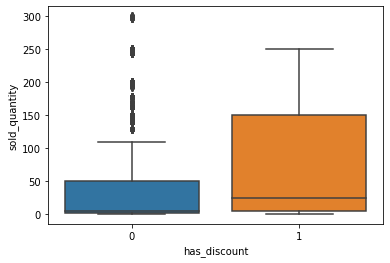

In [64]:
sns.boxplot(y=df_filtered["sold_quantity"], 
             x=df_filtered["has_discount"] )

In [68]:
items_dataset.groupby('has_discount')['sold_quantity', 
                                    'total_transactions_seller'].median()

<ipython-input-68-c1ad90000a55>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  items_dataset.groupby('has_discount')['sold_quantity',


,sold_quantity,total_transactions_seller
has_discount,,
0,5,12273
1,150,24190


In [69]:
pd.crosstab(index=items_dataset['has_discount'],
                   columns=items_dataset['power_seller_status']
                   ).apply(lambda r: r/r.sum() *100,
                           axis=1)

power_seller_status,gold,platinum,silver
has_discount,,,
0,7.425488,86.182858,6.391654
1,2.617246,97.141755,0.240999


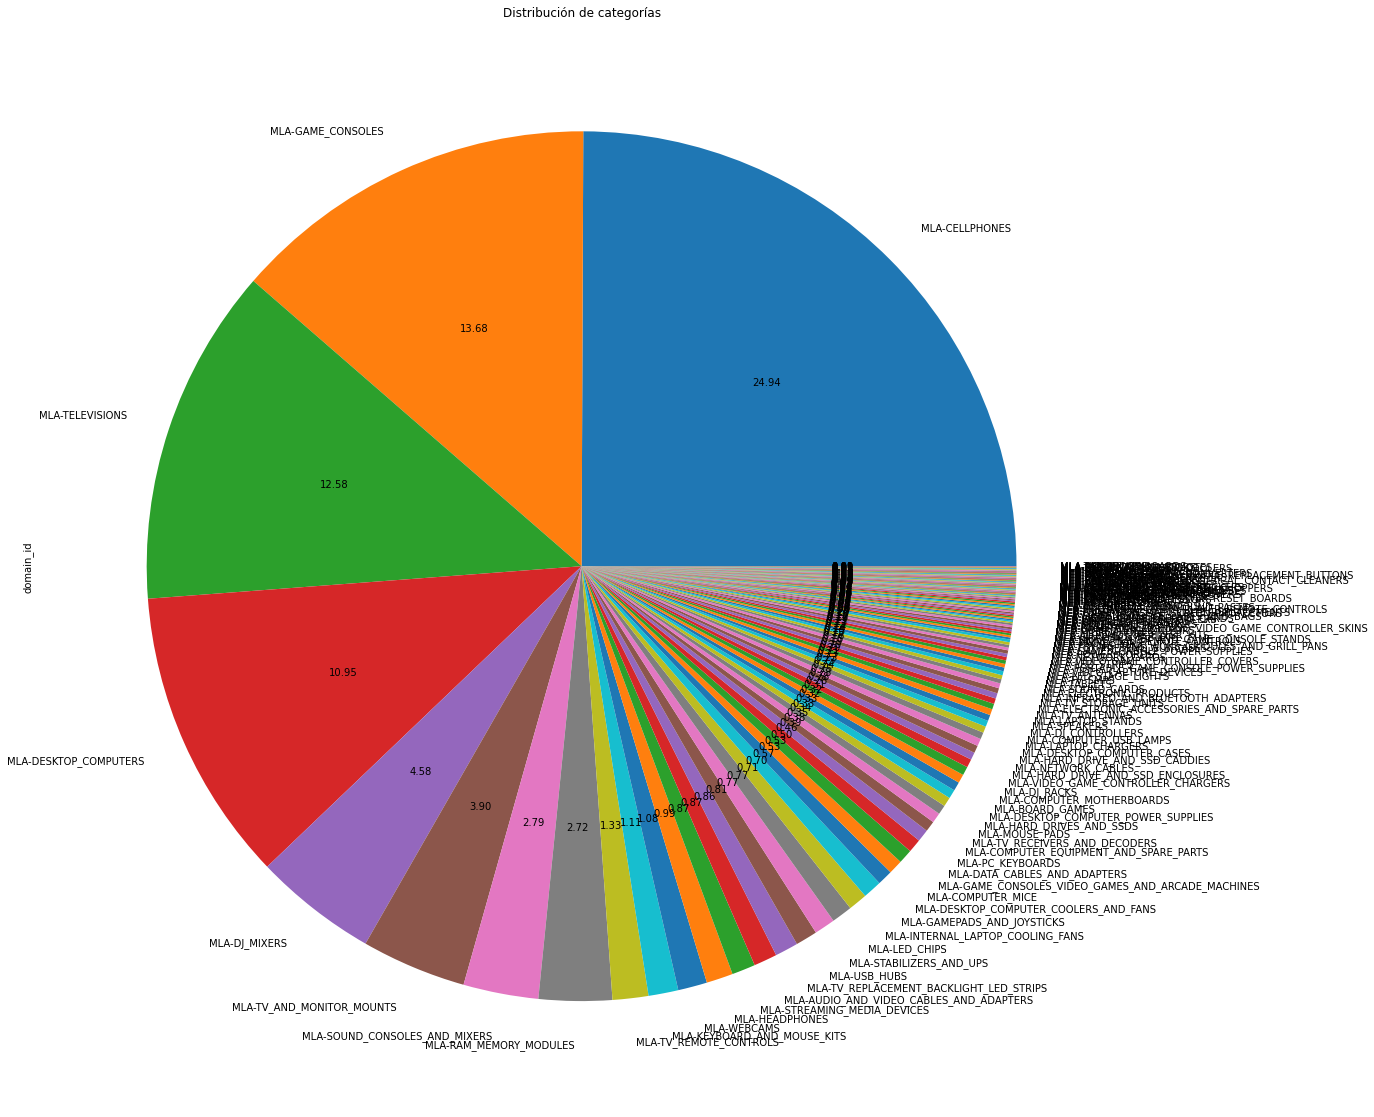

In [71]:
items_dataset.domain_id.value_counts().plot(kind='pie',
                                              figsize=(20, 20),
                                              title='Distribución de categorías',
                                             autopct='%.2f')

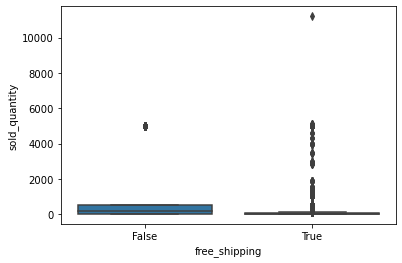

In [72]:
sns.boxplot( y=items_dataset["sold_quantity"], 
             x=items_dataset["free_shipping"] );


In [9]:
Q1 = np.quantile(items_discount["sold_quantity"],0.25)
Q3 = np.quantile(items_discount["sold_quantity"],0.75)
IQR = Q3 - Q1

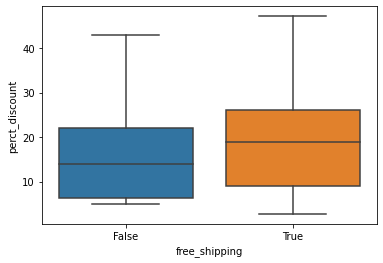

In [13]:
sns.boxplot( y=items_discount["perct_discount"], 
             x=items_discount["free_shipping"] );

In [40]:
items_dataset.power_seller_status.value_counts()

platinum    147615
gold         11525
silver        9503
Name: power_seller_status, dtype: int64

In [39]:
items_discount.power_seller_status.value_counts()

platinum    20154
gold          543
silver         50
Name: power_seller_status, dtype: int64

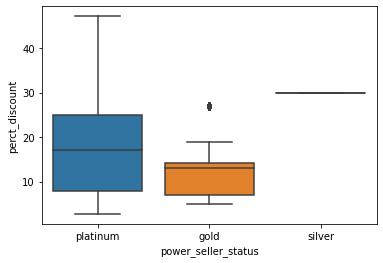

In [38]:
sns.boxplot( y=items_discount["perct_discount"], 
             x=items_discount["power_seller_status"] );

In [ ]:
sns.boxplot( y=items_discount["perct_discount"], 
             x=items_discount["power_seller_status"] );

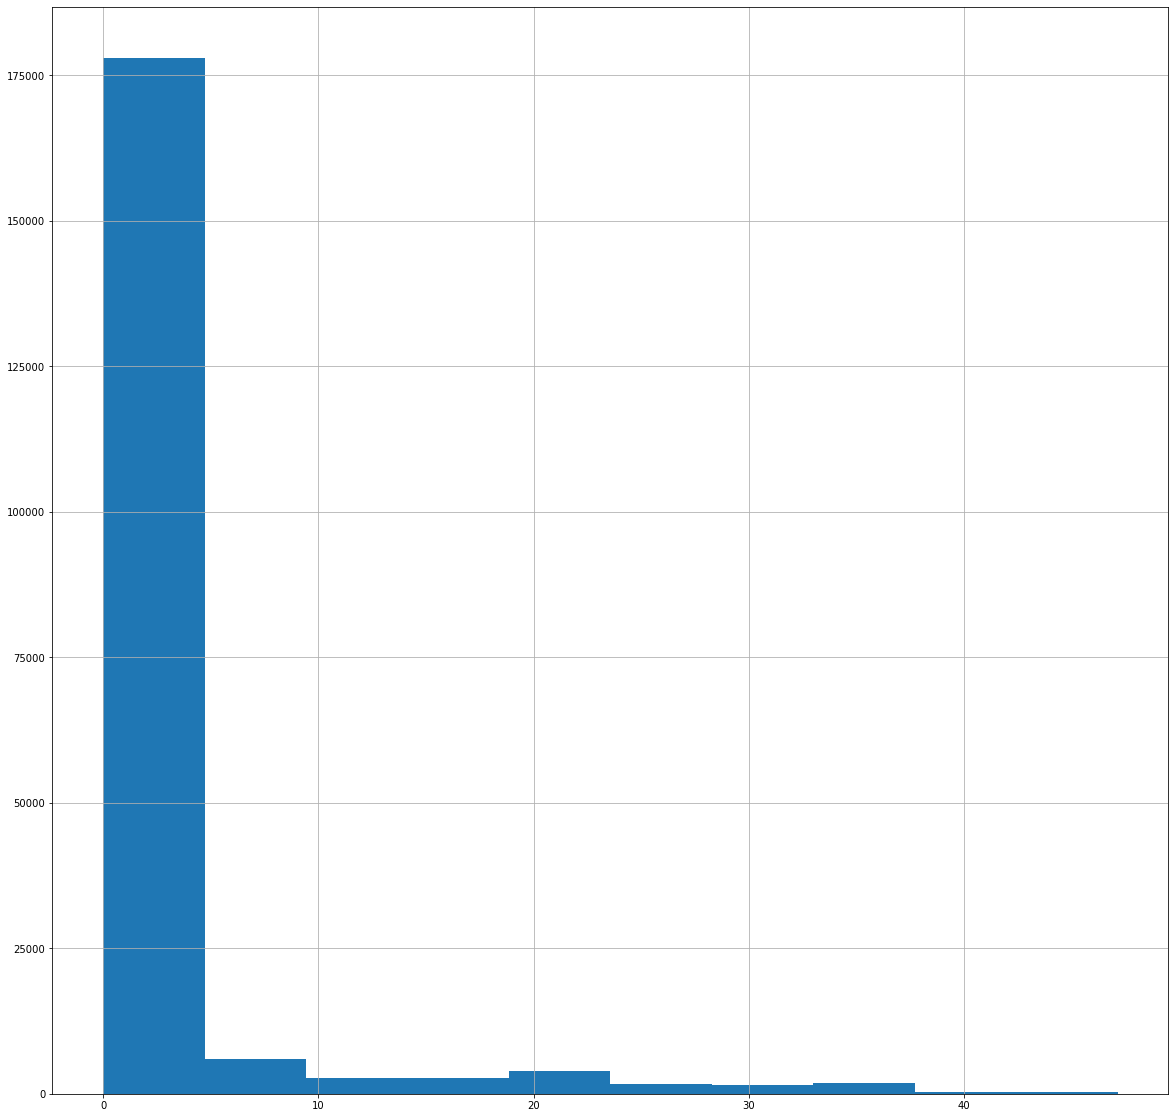

In [73]:
items_dataset["perct_discount"].hist(figsize=(20,20))

In [18]:
items_discount.groupby(['domain_id']).size().reset_index(name='count').sort_values(by='count', 
                                                                                    ascending=False)

,domain_id,count
38,MLA-TELEVISIONS,4213
3,MLA-CELLPHONES,3085
10,MLA-DESKTOP_COMPUTERS,2927
39,MLA-TV_AND_MONITOR_MOUNTS,2666
16,MLA-GAME_CONSOLES,1161
23,MLA-KEYBOARD_AND_MOUSE_KITS,750
49,MLA-WEBCAMS,669
12,MLA-DESKTOP_COMPUTER_COOLERS_AND_FANS,349
21,MLA-HEADPHONES,300
29,MLA-PC_KEYBOARDS,300


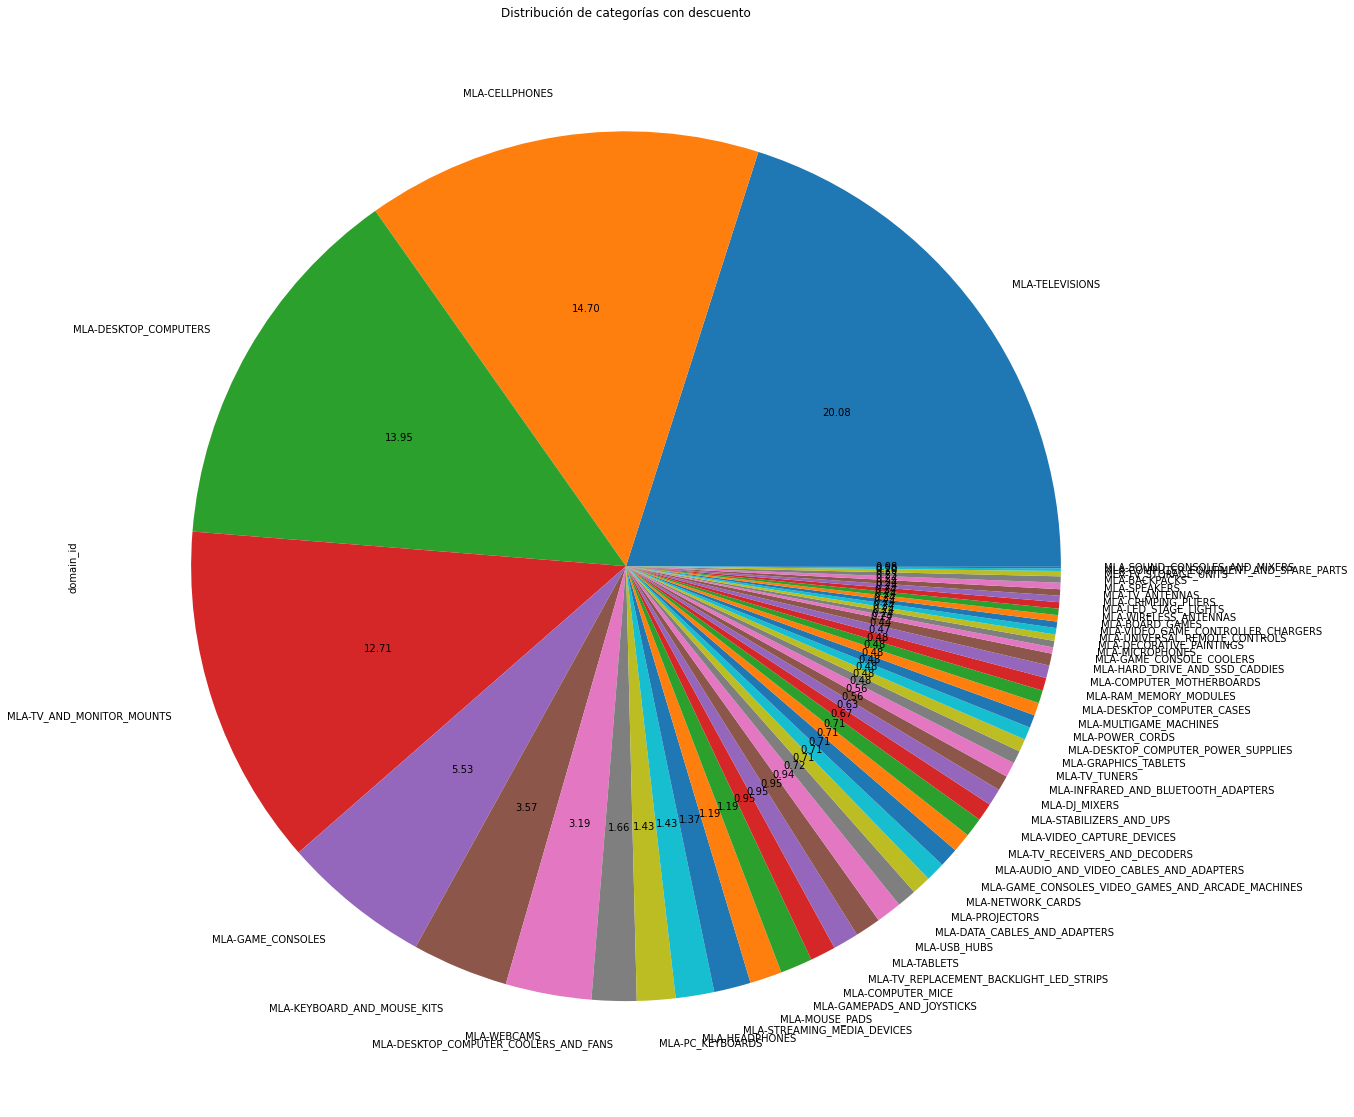

In [19]:
items_discount.domain_id.value_counts().plot(kind='pie',
                                              figsize=(20, 20),
                                              title='Distribución de categorías con descuento',
                                             autopct='%.2f')

In [23]:
items_discount.groupby('domain_id')['perct_discount'].agg({'mean'}).sort_values(by='mean', 
                                                                                ascending=False)

,mean
domain_id,
MLA-UNIVERSAL_REMOTE_CONTROLS,37.195994
MLA-COMPUTER_MOTHERBOARDS,34.996539
MLA-PROJECTORS,32.665137
MLA-MULTIGAME_MACHINES,32.312663
MLA-TV_ANTENNAS,29.000000
MLA-LED_STAGE_LIGHTS,27.275207
MLA-TABLETS,25.838773
MLA-WEBCAMS,25.347278
MLA-PC_KEYBOARDS,25.167136


In [25]:
items_discount.groupby('domain_id')['sold_quantity'].agg({'sum', 'count'}).sort_values(by='sum', 
                                                                                ascending=False)

,sum,count
domain_id,,
MLA-TV_AND_MONITOR_MOUNTS,2682600,2666
MLA-DESKTOP_COMPUTER_COOLERS_AND_FANS,624500,349
MLA-DESKTOP_COMPUTERS,408166,2927
MLA-CELLPHONES,392259,3085
MLA-KEYBOARD_AND_MOUSE_KITS,287500,750
MLA-WEBCAMS,251400,669
MLA-GAME_CONSOLES,178050,1161
MLA-TELEVISIONS,175655,4213
MLA-PC_KEYBOARDS,125000,300


In [23]:
items_discount.groupby('domain_id')['sold_quantity'].agg({'mean', 'count'}).sort_values(by='mean', 
                                                                                ascending=False)

,mean,count
domain_id,,
MLA-DESKTOP_COMPUTER_COOLERS_AND_FANS,1789.398281,349
MLA-TV_AND_MONITOR_MOUNTS,1006.226557,2666
MLA-WIRELESS_ANTENNAS,500.000000,50
MLA-DECORATIVE_PAINTINGS,500.000000,50
MLA-POWER_CORDS,500.000000,100
MLA-STABILIZERS_AND_UPS,500.000000,133
MLA-TV_TUNERS,500.000000,100
MLA-UNIVERSAL_REMOTE_CONTROLS,500.000000,50
MLA-TV_STORAGE_UNITS,500.000000,41


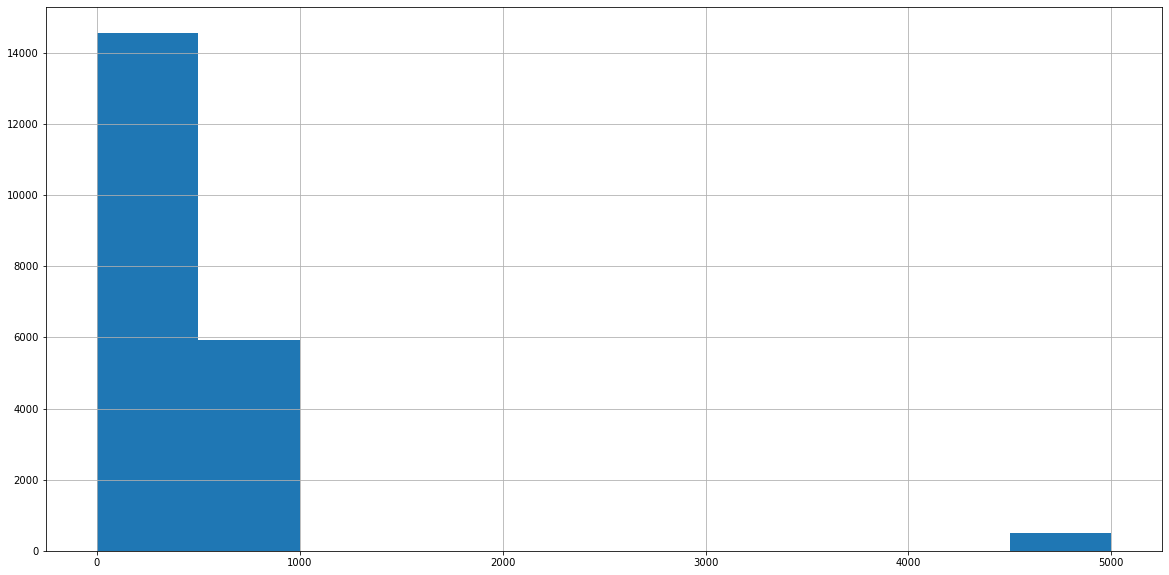

In [33]:
items_discount['sold_quantity'].hist(figsize=(20,10))

In [26]:
pd.crosstab(index=items_discount['free_shipping'],
                   columns=items_discount['category']
                   ).apply(lambda r: r/r.sum() *100,
                           axis=1)

category,celulares,computador,consola,tv
free_shipping,,,,
False,8.510356,29.089219,7.302177,55.098247
True,18.169653,39.060293,11.121850,31.648205


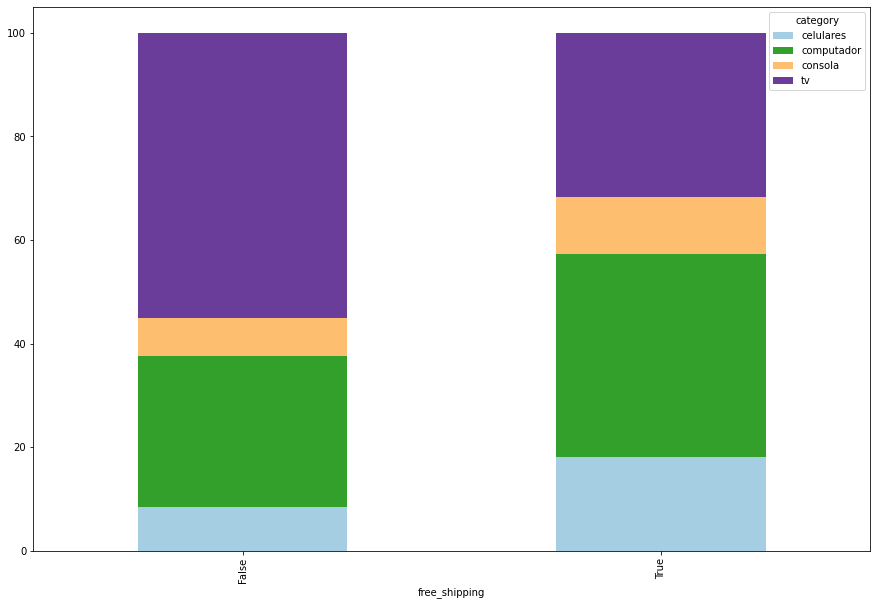

In [41]:
# graphically 
plot = pd.crosstab(index=items_discount['free_shipping'],
                   columns=items_discount['category']
                   ).apply(lambda r: r/r.sum() *100,
                           axis=1).plot(kind='bar', 
                                        stacked=True, 
                                        colormap=ListedColormap(
                                           sns.color_palette("Paired", 10)
                                           ),
                                           figsize=(15,10))

In [43]:
items_discount.groupby('free_shipping')['sold_quantity', 
                                        'perct_discount', 
                                        'total_transactions_seller'].median()

<ipython-input-43-0ddcf7c53859>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  items_discount.groupby('free_shipping')['sold_quantity',


,sold_quantity,perct_discount,total_transactions_seller
free_shipping,,,
False,500,13.900862,25364
True,50,19.000000,23220


# Desarrollar modelo

In [76]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot


In [20]:
items_dataset.head()

,title,price,domain_id,condition,free_shipping,available_quantity,total_transactions_seller,canceled_transactions_seller,completed_transactions_reseller,positive_rating,...,neutral_rating,delayed_handlingtime_rate,delayed_handlingtime_value,seller_sales_completed,seller_cancellations_rate,seller_cancellations_value,sold_quantity,price_change,has_discount,perct_discount
0,Smart Tv Hitachi Cdh-le32smart17 Led Hd 32,24999.0,MLA-TELEVISIONS,new,False,145,11374,1116,10258,0.88,...,0.07,0.0000,0,845,0.0000,0,17,8000.0,1,24.243159
1,Smart Tv Samsung Series 7 Un50tu7000gczb Led 4...,56999.0,MLA-TELEVISIONS,new,False,9,21670,2258,19412,0.83,...,0.06,0.0000,0,3777,0.0000,0,0,0.0,0,0.000000
2,Smart Tv Noblex Dm32x7000 Led Hd 32,24999.0,MLA-TELEVISIONS,new,True,9,6889,521,6368,0.93,...,0.04,0.0500,27,954,0.0000,0,171,0.0,0,0.000000
3,Smart Tv Tedge Ntv43hd Led Full Hd 43,32999.0,MLA-TELEVISIONS,new,True,1786,325068,14429,310639,0.96,...,0.01,0.0000,0,67102,0.0006,46,2849,2000.0,1,5.714449
4,Smart Tv Rca Xf43sm Led Full Hd 43,33480.0,MLA-TELEVISIONS,new,True,10,13847,642,13205,0.98,...,0.01,0.0031,5,1756,0.0049,9,1,0.0,0,0.000000


In [55]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [56]:
items_dataset_filtered = remove_outlier(items_dataset, 'sold_quantity')

In [57]:
X = items_dataset_filtered.drop(['sold_quantity'], 
                       axis = 1).copy()
y = items_dataset_filtered['sold_quantity'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=666)

In [58]:
gbr = GradientBoostingRegressor(n_estimators=600, 
    max_depth=5, 
    learning_rate=0.01, 
    min_samples_split=3)
gbr = GradientBoostingRegressor()

In [59]:
gbr.fit(X_train, y_train)


GradientBoostingRegressor()

In [60]:
y_pred = gbr.predict(X_test)
rmse = mean_squared_error(y_test,y_pred, squared=False)
 
print("RMSE: %.2f" % rmse)

RMSE: 52.44


300

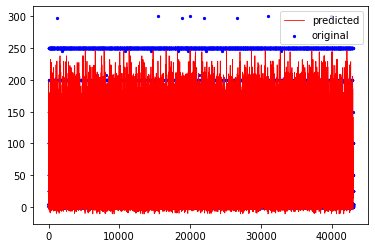

In [72]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

[5.30538994e-01 2.89808777e-03 9.19629114e-04 6.26639690e-02
 5.38885198e-02 1.82398780e-02 6.89694916e-02 1.47200743e-02
 2.30136840e-04 3.66447535e-03 1.02019190e-02 2.32915445e-02
 7.59297125e-03 1.24244529e-01 1.38981704e-02 1.52277905e-02
 1.93410977e-02 0.00000000e+00 2.94687215e-02]


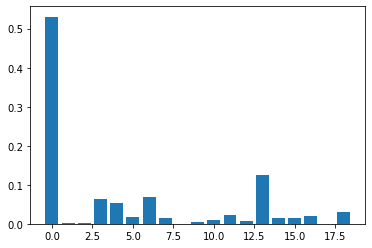

In [77]:
print(gbr.feature_importances_)
pyplot.bar(range(len(gbr.feature_importances_)), gbr.feature_importances_)
pyplot.show()

44

'ARS'

True

dict